In [55]:
# Working with missing data
import numpy as np
import pandas as pd

# Missing data basics
When / why does data become missing?

Some might quibble over our usage of missing. By “missing” we simply mean null or “not present for whatever reason”. 
Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. 
For example, in a collection of financial time series, some of the time series might start on different dates. 
Thus, values prior to the start date would generally be marked as missing.

In pandas, one of the most common ways that missing data is introduced into a data set is by reindexing. For example

In [56]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one', 'two', 'three'])
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [57]:
df

,one,two,three,four,five
a,-0.051001,-1.446292,1.062388,bar,False
c,-0.460064,0.896613,1.257568,bar,False
e,0.440393,-0.868972,-0.784766,bar,True
f,1.271728,1.892150,0.479191,bar,True
h,0.375594,-0.460334,0.853069,bar,True


In [58]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.051001,-1.446292,1.062388,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-0.460064,0.896613,1.257568,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,0.440393,-0.868972,-0.784766,bar,True
f,1.271728,1.892150,0.479191,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,0.375594,-0.460334,0.853069,bar,True


Values considered "missing"

In [59]:
df2['one']

a   -0.051001
b         NaN
c   -0.460064
d         NaN
e    0.440393
f    1.271728
g         NaN
h    0.375594
Name: one, dtype: float64

In [60]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [61]:
df2['four'].notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [62]:
df2.isnull()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


**Warning:** One has to be mindful that in python (and numpy), the nan's don’t compare equal, but None's do. Note that Pandas/numpy uses the fact that np.nan != np.nan, and treats None like np.nan.

In [63]:
None == None

True

In [64]:
np.nan == np.nan

False

So as compared to above, a scalar equality comparison versus a None/np.nan doesn’t provide useful information.

In [65]:
df2['one'] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

In [66]:
None == np.nan

False

**Datatimes**

For datetime64[ns] types, NaT represents missing values. This is a pseudo-native sentinel value that can be 
represented by numpy in a singular dtype (datetime64[ns]). pandas objects provide intercompatibility between NaT and NaN.

In [67]:
df2 = df.copy()

In [68]:
df2['timestamp'] = pd.Timestamp('20120101')

In [69]:
df2

,one,two,three,four,five,timestamp
a,-0.051001,-1.446292,1.062388,bar,False,2012-01-01
c,-0.460064,0.896613,1.257568,bar,False,2012-01-01
e,0.440393,-0.868972,-0.784766,bar,True,2012-01-01
f,1.271728,1.892150,0.479191,bar,True,2012-01-01
h,0.375594,-0.460334,0.853069,bar,True,2012-01-01


In [70]:
df2.ix[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan
df2

,one,two,three,four,five,timestamp
a,NaN,-1.446292,1.062388,bar,False,NaT
c,NaN,0.896613,1.257568,bar,False,NaT
e,0.440393,-0.868972,-0.784766,bar,True,2012-01-01
f,1.271728,1.892150,0.479191,bar,True,2012-01-01
h,NaN,-0.460334,0.853069,bar,True,NaT


In [71]:
df2.get_dtype_counts()

bool              1
datetime64[ns]    1
float64           3
object            1
dtype: int64

**Inserting missing data**

You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based on dtype.

For example, numeric containers will always use NaN regardless of the missing value type chosen:

In [72]:
s = pd.Series([1, 2, 3])

In [73]:
s.loc[0] = None

In [74]:
s

0   NaN
1     2
2     3
dtype: float64

Likewise, date time containers will always use NaT.
For object containers, pandas will use the value given.

For object containers, pandas will use the value given.

In [75]:
s = pd.Series(['a', 'b', 'c'])

In [76]:
s.loc[0] = None

In [77]:
s.loc[1] = np.nan

In [78]:
s

0    None
1     NaN
2       c
dtype: object

***Calculations with missing data***

Missing values propagate naturally through arithmetic operations between pandas objects.

In [79]:
a =df2[['one', 'two']]
a

,one,two
a,NaN,-1.446292
c,NaN,0.896613
e,0.440393,-0.868972
f,1.271728,1.892150
h,NaN,-0.460334


In [80]:
b = df2[['one', 'two', 'three']]
b

,one,two,three
a,NaN,-1.446292,1.062388
c,NaN,0.896613,1.257568
e,0.440393,-0.868972,-0.784766
f,1.271728,1.892150,0.479191
h,NaN,-0.460334,0.853069


In [81]:
a + b

,one,three,two
a,NaN,NaN,-2.892584
c,NaN,NaN,1.793225
e,0.880787,NaN,-1.737944
f,2.543457,NaN,3.784299
h,NaN,NaN,-0.920668


The descriptive statistics and computational methods discussed in the data structure overview (and listed here and here)
are all written to account for missing data. For example:

* When summing data, NA (missing) values will be treated as zero;
* If the data are all NA, the result will be NA;
* Methods like **cumsum** and **cumprod** ignore NA values, but preserve them in the resulting arrays.

In [82]:
df

,one,two,three,four,five
a,-0.051001,-1.446292,1.062388,bar,False
c,-0.460064,0.896613,1.257568,bar,False
e,0.440393,-0.868972,-0.784766,bar,True
f,1.271728,1.892150,0.479191,bar,True
h,0.375594,-0.460334,0.853069,bar,True


In [83]:
df['one'].sum()

1.576650985448258

In [84]:
df.mean(1)

a   -0.108726
c    0.423529
e   -0.053336
f    1.160767
h    0.442082
dtype: float64

In [85]:
df.cumsum()

,one,two,three,four,five
a,-0.0510007,-1.44629,1.06239,bar,False
c,-0.511065,-0.549679,2.31996,barbar,0
e,-0.0706718,-1.41865,1.53519,barbarbar,1
f,1.20106,0.473498,2.01438,barbarbarbar,2
h,1.57665,0.0131643,2.86745,barbarbarbarbar,3


**NA values in GroupBy**

NA groups in GroupBy are automatically excluded. This behavior is consistent with R, for example:

In [86]:
df

,one,two,three,four,five
a,-0.051001,-1.446292,1.062388,bar,False
c,-0.460064,0.896613,1.257568,bar,False
e,0.440393,-0.868972,-0.784766,bar,True
f,1.271728,1.892150,0.479191,bar,True
h,0.375594,-0.460334,0.853069,bar,True


In [87]:
df.groupby('one').mean()

,two,three,five
one,,,
-0.460064,0.896613,1.257568,False
-0.051001,-1.446292,1.062388,False
0.375594,-0.460334,0.853069,True
0.440393,-0.868972,-0.784766,True
1.271728,1.892150,0.479191,True


** Cleaning / filling missing data **

pandas objects are equipped with various data manipulation methods for dealing with missing data.

Filling missing values: fillna

** Replace NA with a scalar value **

In [88]:
df2

,one,two,three,four,five,timestamp
a,NaN,-1.446292,1.062388,bar,False,NaT
c,NaN,0.896613,1.257568,bar,False,NaT
e,0.440393,-0.868972,-0.784766,bar,True,2012-01-01
f,1.271728,1.892150,0.479191,bar,True,2012-01-01
h,NaN,-0.460334,0.853069,bar,True,NaT


In [89]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,-1.446292,1.062388,bar,False,1970-01-01
c,0.000000,0.896613,1.257568,bar,False,1970-01-01
e,0.440393,-0.868972,-0.784766,bar,True,2012-01-01
f,1.271728,1.892150,0.479191,bar,True,2012-01-01
h,0.000000,-0.460334,0.853069,bar,True,1970-01-01


In [90]:
df2['four'].fillna('missing')

a    bar
c    bar
e    bar
f    bar
h    bar
Name: four, dtype: object

** Fill gaps forward or backward **

Using the same filling arguments as reindexing, we can propagate non-null values forward or backward:

In [94]:
df = df[['one', 'two', 'three']]
df.ix[['a', 'c', 'h'], ['one']] = np.nan
df

,one,two,three
a,NaN,-1.446292,1.062388
c,NaN,0.896613,1.257568
e,0.440393,-0.868972,-0.784766
f,1.271728,1.892150,0.479191
h,NaN,-0.460334,0.853069


In [95]:
df.fillna(method='pad')

,one,two,three
a,NaN,-1.446292,1.062388
c,NaN,0.896613,1.257568
e,0.440393,-0.868972,-0.784766
f,1.271728,1.892150,0.479191
h,1.271728,-0.460334,0.853069


To remind you, these are the available filling methods:

| Method | Action |
| -----------------|---------------------|
| pad / ffill | Fill values forward |
| bfill / backfill | Fill values backward |
With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point.

The ffill() function is equivalent to fillna(method='ffill') and bfill() is equivalent to fillna(method='bfill')

**Filling with a PandasObject**

You can also fillna using a dict or Series that is alignable. The labels of the dict or index of the Series must match the 
columns of the frame you wish to fill. The use case of this is to fill a DataFrame with the mean of that column.

In [97]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan
dff

,A,B,C
0,-1.723017,0.454919,-0.934285
1,1.473259,0.831353,0.707768
2,-1.191154,-0.126576,-1.569522
3,NaN,1.062250,-1.937820
4,NaN,NaN,0.618951
5,-1.252654,NaN,NaN
6,-1.149840,-0.133111,NaN
7,-2.086881,-0.002218,NaN
8,0.186197,1.392759,-0.976171
9,0.838028,-0.618835,-1.012348


In [98]:
dff.fillna(dff.mean()) # use mean of each to fill in NaN 

,A,B,C
0,-1.723017,0.454919,-0.934285
1,1.473259,0.831353,0.707768
2,-1.191154,-0.126576,-1.569522
3,-0.613258,1.062250,-1.937820
4,-0.613258,0.357568,0.618951
5,-1.252654,0.357568,-0.729061
6,-1.149840,-0.133111,-0.729061
7,-2.086881,-0.002218,-0.729061
8,0.186197,1.392759,-0.976171
9,0.838028,-0.618835,-1.012348


In [100]:
dff.fillna(dff.mean()['B':'C']) # only fill in NaN for B, C columns

,A,B,C
0,-1.723017,0.454919,-0.934285
1,1.473259,0.831353,0.707768
2,-1.191154,-0.126576,-1.569522
3,NaN,1.062250,-1.937820
4,NaN,0.357568,0.618951
5,-1.252654,0.357568,-0.729061
6,-1.149840,-0.133111,-0.729061
7,-2.086881,-0.002218,-0.729061
8,0.186197,1.392759,-0.976171
9,0.838028,-0.618835,-1.012348


Same result as above, but is aligning the ‘fill’ value which is a Series in this case.

In [103]:
dff.where(pd.notnull(dff), dff.mean(), axis='columns')  # did not quite get this one

,A,B,C
0,-1.723017,0.454919,-0.934285
1,1.473259,0.831353,0.707768
2,-1.191154,-0.126576,-1.569522
3,-0.613258,1.062250,-1.937820
4,-0.613258,0.357568,0.618951
5,-1.252654,0.357568,-0.729061
6,-1.149840,-0.133111,-0.729061
7,-2.086881,-0.002218,-0.729061
8,0.186197,1.392759,-0.976171
9,0.838028,-0.618835,-1.012348


** Dropping axis labels with missing data: dropna **

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use the dropna method:

In [104]:
df

,one,two,three
a,NaN,-1.446292,1.062388
c,NaN,0.896613,1.257568
e,0.440393,-0.868972,-0.784766
f,NaN,1.892150,0.479191
h,NaN,NaN,0.853069


In [105]:
df.dropna(axis=1)

,three
a,1.062388
c,1.257568
e,-0.784766
f,0.479191
h,0.853069


In [106]:
df.dropna(axis=0)

,one,two,three
e,0.440393,-0.868972,-0.784766


In [107]:
df['one'].dropna()

e    0.440393
Name: one, dtype: float64

Series.dropna is a simpler method as it only has one axis to consider.

**Interpolation**

Both Series and Dataframe objects have an interpolate method that, by default, performs linear interpolation at missing 
datapoints.

In [113]:
i = pd.date_range('20000131', periods=100, freq='M')
i

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31',
               '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30',
               '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31',
      

In [158]:
temp = pd.DataFrame(dict(year = i.year, month = i.month, day = i.day))
ts = pd.DataFrame({"date":pd.to_datetime(temp.year*10000 + temp.month * 100 + temp.day, format="%Y%m%d"), "value":np.random.randn(100)})
ts.ix[1:39, ['value']] = np.nan


In [159]:
ts
ts.loc[1:50, ['value']]

,value
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN
10,NaN


## **Different Choices for Indexing**
New in version 0.11.0.

Object selection has had a number of user-requested additions in order to support more explicit location based indexing. pandas now supports three types of multi-axis indexing.

* .loc is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. Allowed inputs are:

    * A single label, e.g. 5 or 'a', (note that 5 is interpreted as a label of the index. This use is not an integer position along the index)
    * A list or array of labels ['a', 'b', 'c']
    * A slice object with labels 'a':'f', (note that contrary to usual python slices, both the start and the stop are included!)
    * A boolean array
See more at Selection by Label

* .iloc is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds, except slice indexers which allow out-of-bounds indexing. (this conforms with python/numpy slice semantics). Allowed inputs are:

    * An integer e.g. 5
    * A list or array of integers [4, 3, 0]
    * A slice object with ints 1:7
    * A boolean array
See more at Selection by Position

* .ix supports mixed integer and label based access. It is primarily label based, but will fall back to integer positional access unless the corresponding axis is of integer type. .ix is the most general and will support any of the inputs in .loc and .iloc. .ix also supports floating point label schemes. .ix is exceptionally useful when dealing with mixed positional and label based hierarchical indexes.

However, when an axis is integer based, ONLY label based access and not positional access is supported. Thus, in such cases, it’s usually better to be explicit and use .iloc or .loc.

See more at Advanced Indexing and Advanced Hierarchical.

Getting values from an object with multi-axes selection uses the following notation (using .loc as an example, but applies to .iloc and .ix as well). Any of the axes accessors may be the null slice :. Axes left out of the specification are assumed to be :. (e.g. p.loc['a'] is equiv to p.loc['a', :, :])

| Object | TypeIndexers |
|--------|---------|
| Series | s.loc[indexer] |
| DataFrame | df.loc[row_indexer,column_indexer]|
| Panel	| p.loc[item_indexer,major_indexer,minor_indexer]|

In [160]:
ts.count()

date     100
value     61
dtype: int64

In [161]:
ts.interpolate().count()

date     100
value    100
dtype: int64

Populating the interactive namespace from numpy and matplotlib


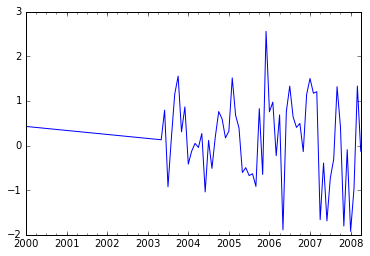

In [163]:
%pylab inline
s = ts['value']
t = ts.date
s.index = t
del s.index.name
s
# ts = 
s.interpolate().plot()

In [181]:
ts2 = s[0:5]
ts2[2] = 2.578
ts2[4] = 6.802
ts2

2000-01-31    0.427489
2000-02-29         NaN
2000-03-31    2.578000
2000-04-30         NaN
2000-05-31    6.802000
Name: value, dtype: float64

In [184]:
ts2.interpolate()

2000-01-31    0.427489
2000-02-29    1.502744
2000-03-31    2.578000
2000-04-30    4.690000
2000-05-31    6.802000
Name: value, dtype: float64

In [185]:
ts2.interpolate(method='time')

2000-01-31    0.427489
2000-02-29    1.466903
2000-03-31    2.578000
2000-04-30    4.655377
2000-05-31    6.802000
Name: value, dtype: float64

For a floating-point index, use method='value'

In [190]:
ser = pd.Series([0, np.nan, 10], index=[0, 1, 10])
ser

0      0
1    NaN
10    10
dtype: float64

In [192]:
ser.interpolate()

0      0
1      5
10    10
dtype: float64

In [195]:
ser.interpolate(method='values')

0      0
1      1
10    10
dtype: float64

You can also interpolate with a DataFrame:

In [198]:
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8], 'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [200]:
df.interpolate()

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [201]:
df.interpolate(method='barycentric')

,A,B
0,1.00,0.250
1,2.10,-7.660
2,3.53,-4.515
3,4.70,4.000
4,5.60,12.200
5,6.80,14.400


In [202]:
df.interpolate(method='pchip')

,A,B
0,1.000000,0.250000
1,2.100000,1.130135
2,3.429309,2.337586
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


When interpolating via a polynomial or spline approximation, you must also specify the degree or order of the approximation:

In [203]:
df.interpolate(method='spline', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-0.428598
2,3.404545,1.206900
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


In [204]:
df.interpolate(method='polynomial', order=2)

,A,B
0,1.000000,0.250000
1,2.100000,-4.161538
2,3.547059,-2.911538
3,4.700000,4.000000
4,5.600000,12.200000
5,6.800000,14.400000


Compare several methods:

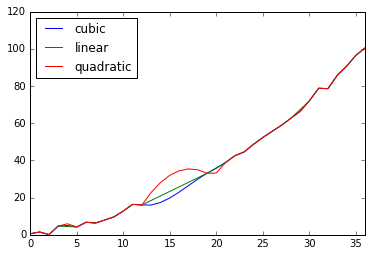

In [205]:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))
bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[bad] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

Another use case is interpolation at new values. Suppose you have 100 observations from some distribution. And let’s suppose that you’re particularly interested in what’s happening around the middle. You can mix pandas’ reindex and interpolate methods to interpolate at the new values.

In [206]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))

# interpolate at new_index
new_index = ser.index | pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])
interp_s = ser.reindex(new_index).interpolate(method='pchip')
interp_s[49:51]

49.00    0.471410
49.25    0.476841
49.50    0.481780
49.75    0.485998
50.00    0.489266
50.25    0.491814
50.50    0.493995
50.75    0.495763
51.00    0.497074
dtype: float64

** Interpolation Limits **

Like other pandas fill methods, interpolate accepts a limit keyword argument. Use this argument to limit the number of consecutive interpolations, keeping NaN values for interpolations that are too far from the last valid observation:

In [207]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13])
ser.interpolate(limit=2)

0   NaN
1   NaN
2     5
3     7
4     9
5   NaN
6    13
dtype: float64

By default, limit applies in a forward direction, so that only NaN values after a non-NaN value can be filled. If you provide 'backward' or 'both' for the limit_direction keyword argument, you can fill NaN values before non-NaN values, or both before and after non-NaN values, respectively:

In [208]:
ser.interpolate(limit=1) # limit_direction == 'forward'

0   NaN
1   NaN
2     5
3     7
4   NaN
5   NaN
6    13
dtype: float64

In [209]:
ser.interpolate(limit=1, limit_direction='backward')

0   NaN
1     5
2     5
3   NaN
4   NaN
5    11
6    13
dtype: float64

In [210]:
ser.interpolate(limit=1, limit_direction='both')

0   NaN
1     5
2     5
3     7
4   NaN
5    11
6    13
dtype: float64

**Replacing Generic Values**

Often times we want to replace arbitrary values with other values. New in v0.8 is the replace method in Series/DataFrame that provides an efficient yet flexible way to perform such replacements.

For a Series, you can replace a single value or a list of values by another value:

In [212]:
ser = pd.Series([0., 1., 2., 3., 4.])
ser.replace(0, 5)

0    5
1    1
2    2
3    3
4    4
dtype: float64

You can replace a list of values by a list of other values:

In [213]:
ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0])

0    4
1    3
2    2
3    1
4    0
dtype: float64

You can also specify a mapping dict:

In [214]:
ser.replace({0: 10, 1: 100})

0     10
1    100
2      2
3      3
4      4
dtype: float64

For a DataFrame, you can specify individual values by column:

In [215]:
df = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
df.replace({'a': 0, 'b': 5}, 100)

,a,b
0,100,100
1,1,6
2,2,7
3,3,8
4,4,9


Instead of replacing with specified values, you can treat all given values as missing and interpolate over them:

In [216]:
ser.replace([1,2,3], method='pad')

0    0
1    0
2    0
3    0
4    4
dtype: float64

**String/Regular Expression Replacement**